## Map of mixed layer depth change

This notebook shows the maps of percentage change in simulated Januray and July mean mixed layer depth when including Langmuir turbulence, estimated by comparing KPPLT-LF17 versus KPP-CVMix, ePBL-LT versus ePBL, and SMCLT-H15 versus SMC-KC94.

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.environ['GOTMWORK_ROOT']+'/tools', )
from gotmanalysis import GOTMMap
%matplotlib inline

In [2]:
# parameters
casename = 'JRA55-do_Global_dampV5d_3h_r4'
# diagnostics
diagname = 'mld_deltaR_mean'
# output figure
figformat = 'pdf'

In [3]:
# lists
month_labels = ['JAN', 'JUL']
timetag_list = ['20090101-20090131',
                '20080701-20080731']
nt = len(timetag_list)
turbmethod_list = ['KPP-CVMix',
                   'KPPLT-ENTR',
                   'EPBL-RH18',
                   'EPBL-RL19',
                   'SMC',
                   'SMCLT']
legend_list = ['KPP-CVMix',
               'KPPLT-LF17',
               'ePBL',
               'ePBL-LT',
               'SMC-KC94',
               'SMCLT-H15']
nm = len(turbmethod_list)
label_list = ['(a) KPPLT-LF17 \n vs. KPP-CVMix',
              '(b) ePBL-LT \n vs. ePBL',
              '(c) SMCLT-H15 \n vs. SMC-KC94',
              '(d) KPPLT-LF17 \n vs. KPP-CVMix',
              '(e) ePBL-LT \n vs. ePBL',
              '(f) SMCLT-H15 \n vs. SMC-KC94']

In [4]:
# path
fig_root = os.environ['GOTMFIG_ROOT']+'/'+casename
os.makedirs(fig_root, exist_ok=True)

In [5]:
# get diagnostics
mld_arr = []
lon_arr = []
lat_arr = []
name_arr = []
units_arr = []
for j in np.arange(nt):
    timetag = timetag_list[j]
    s2data_root = os.environ['GOTMFIG_ROOT']+'/data/'+casename+'/VR1m_DT600s_'+timetag
    for i in np.arange(nm):
        turbmethod = turbmethod_list[i]
        print(turbmethod)
        s2data_name = s2data_root+'/data_map_'+diagname+'_'+turbmethod+'.npz'
        # read data
        gmobj = GOTMMap().load(s2data_name)
        if i == 0:
            nloc = len(gmobj.data)
            mld = np.zeros([nm, nloc])
            lon = gmobj.lon
            lat = gmobj.lat
            name = gmobj.name
            units = gmobj.units
        mld[i,:] = gmobj.data
    mld_arr.append(mld)
    lon_arr.append(lon)
    lat_arr.append(lat)
    name_arr.append(name)
    units_arr.append(units)
    

KPP-CVMix
KPPLT-ENTR
EPBL-RH18
EPBL-RL19
SMC
SMCLT
KPP-CVMix
KPPLT-ENTR
EPBL-RH18
EPBL-RL19
SMC
SMCLT


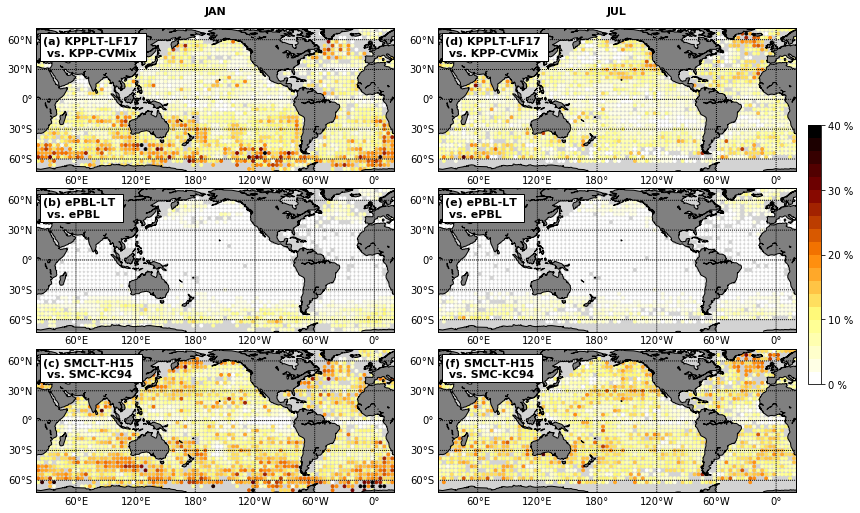

In [6]:
# create figure
nrow = 3
fig_width = 12
fig_height = 7

# plot figure
f, axarr = plt.subplots(nrow, 2, sharex='col')
f.set_size_inches(fig_width, fig_height)

levels1 = list(np.arange(21)*2)
for j in np.arange(nt):
    for i in np.arange(int(nm/2)):
    # plot figure
        k = int(nt*i)
        gmdata = (mld_arr[j][k+1,:]/mld_arr[j][k,:] - 1.0) * 100.0
        gmobj = GOTMMap(data=gmdata, lon=lon_arr[j], lat=lat_arr[j],
                        name=name_arr[j], units=units_arr[j])
        im1 = gmobj.plot(axis=axarr[i,j], levels=levels1,
                         add_colorbar=False, cmap='afmhot_r')
        axarr[i,j].text(0.02, 0.94, label_list[i+3*j],
                        transform=axarr[i,j].transAxes,
                        fontsize=11, color='k', fontweight='bold', va='top',
                        bbox=dict(boxstyle="square",ec='k',fc='w'))
        if i == 0:
            axarr[i,j].text(0.5, 1.15, month_labels[j],
                            transform=axarr[i,j].transAxes,
                            fontsize=11, color='k', fontweight='bold',
                            ha='center', va='top')

# reduce margin
plt.tight_layout()

# colorbar
plt.subplots_adjust(right=0.95)
plt.subplots_adjust(top=0.95)
cb_ticks1 = list(np.arange(5)*10)
cb_ticks_labels1 = ['{:d} %'.format(cb_ticks1[i]) for i in np.arange(5)]
cax1 = plt.axes([0.85, 0.05, 0.1, 0.9])
cax1.set_visible(False)
cb1 = plt.colorbar(im1, ax=cax1, ticks=cb_ticks1)
cb1.ax.set_yticklabels(cb_ticks_labels1)

# save figure
figname = fig_root+'/map_mld_change.'+figformat
plt.savefig(figname, dpi = 300)